# Monte Carlo Method Stock Price Simulation

   This Monte Carlo Method Stock Simulator utilizes Alpha Vantage's API. We can retrieve the data from the latest trading day, I used the adjusted close call to get data.  

In [1]:
#Necessary Imports
import datetime
import math
from scipy.stats import norm
import pandas as pd
import matplotlib
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

#Insert stock symbol to model
stock = 'AMZN'

#Insert your API Key here
API_KEY = 'YJK98D4VULD5HOE1'

#API Call using Alpha Vantage, output_format is full to retrieve as much data as possible
ts = TimeSeries(key=API_KEY, output_format='pandas', indexing_type='date')
stockData, meta_data = ts.get_daily_adjusted(symbol=stock,outputsize='full')

#Renaming columns and changing the index type from str to datetime format so we can compute CAGR
stockData=stockData.rename(columns = {'1. open':'Open',
                                      '2. high':'High',
                                      '3. low':'Low',
                                      '4. close':'Close',
                                      '5. adjusted close':'Adjusted Close',
                                      '6. volume':'Volume'})

#Convert the index to datetime format and sort so we can get time elapsed
stockData.index = pd.to_datetime(stockData.index)
stockData.sort_index()
days = (stockData.index[-1] - stockData.index[0]).days


In [2]:
#Compound annual growth rate computation
end_value = stockData['Adjusted Close'][-1]
begin_value= stockData['Adjusted Close'][1]
inverse_num_years = 365.0/days
cagr = ((end_value/begin_value)**inverse_num_years) - 1

print('Compund Annual Growth Rate: ' + str(round(cagr,2)*100)+'%')


#Creating a series of percentage returns and calculating the annual volatility
stockData['Returns'] = stockData['Adjusted Close'].pct_change()
volatility = stockData['Returns'].std() * (math.sqrt(252))
print('Annualized Volatility: ' + str(round(volatility,2)*100)+'%')

Compund Annual Growth Rate: 18.0%
Annualized Volatility: 53.0%


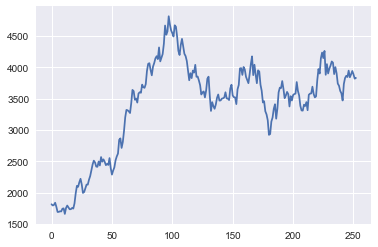

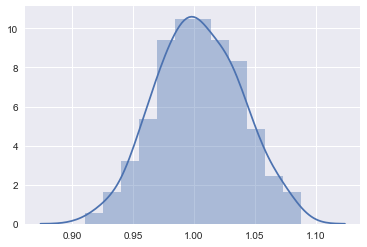

In [3]:
# S is the latest close data point
S = stockData['Adjusted Close'][-1]
#T is the number of trading days in a year, the x-axis we will model
T = 252

#Creating a list of daily returns using a random normal distribution ie, np.random.normal
daily_returns=np.random.normal((cagr/T),volatility/math.sqrt(T),T)+1

# The starting price is the latest adjusted close and we create a price series from the daily_returns generated
price_list = [S]
for x in daily_returns:
    price_list.append(price_list[-1]*x)

# This plots only one random walk of the stock and the histogram corresponding to it
# It gives us no insight though since the probability of this exact distribution happending is basically zero
plt.plot(price_list)
plt.show()


# plt.hist(daily_returns - 1,bins=100)
# plt.show()
sns.distplot(daily_returns)

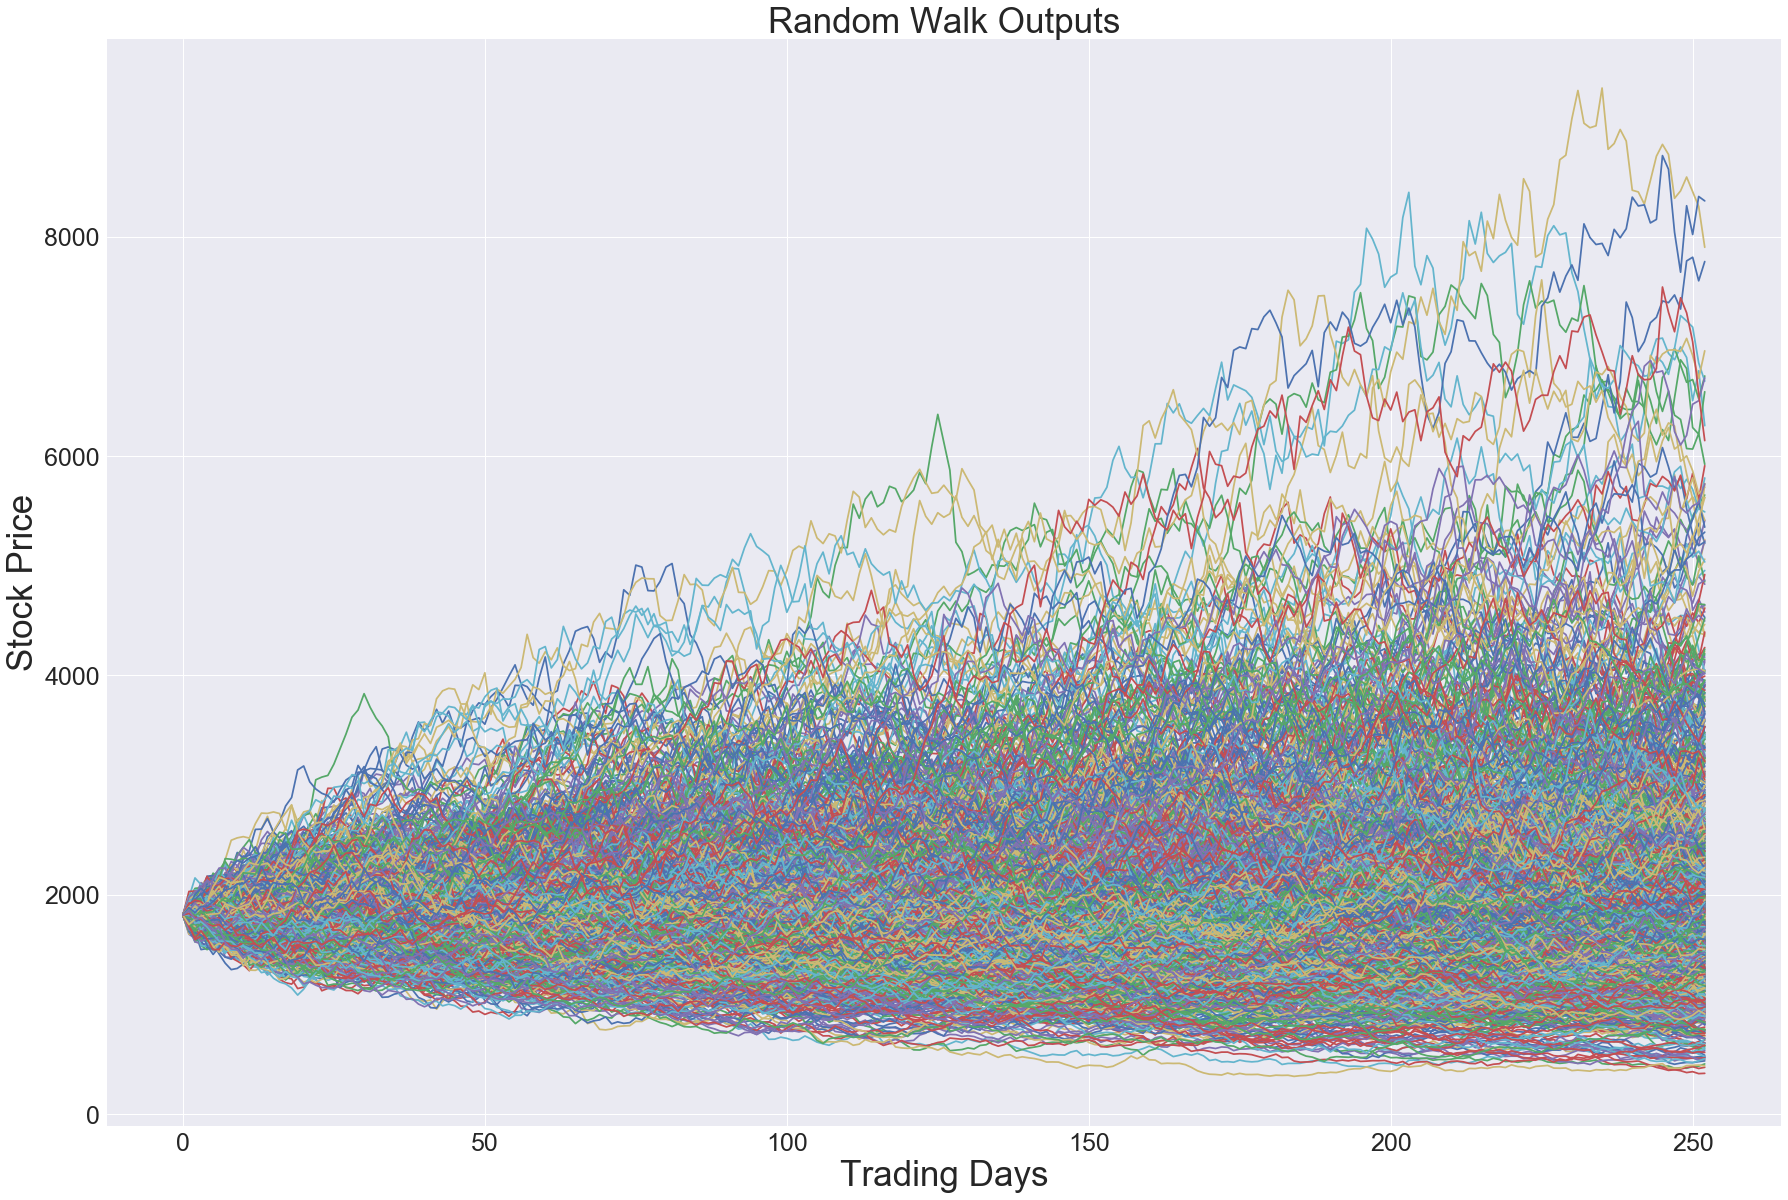

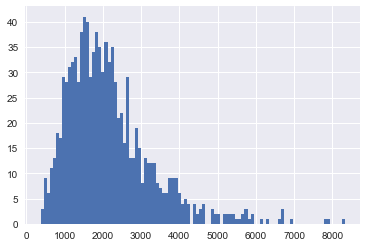

In [4]:
# Now we overlay all of the plots onto one graph for as many trials as we wish to simulate
# Giving us the potential outcomes generated for all trials from cagr and volatility and randomness
plt.figure(figsize=(30,20))
plt.title('Random Walk Outputs', fontsize=35)
plt.xlabel('Trading Days', fontsize=35)
plt.ylabel('Stock Price', fontsize=35)
plt.tick_params(labelsize=25)

S = stockData['Adjusted Close'][-1]
T = 252
ending_prices = list()

trials = 1000
for x in range(trials):
    daily_returns=np.random.normal((cagr/T),volatility/math.sqrt(T),T)+1
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
        
    plt.plot(price_list)
    
    ending_prices.append(price_list[-1])
    

plt.show()
# print(price_list)


plt.hist(ending_prices,bins=100)
plt.show()


In [5]:
#The mean of our ending prices is our expected value, using numpy to calculate mean
expected_final_val  = round(np.mean(ending_prices),2)
print("Expected Final Value: " + str(expected_final_val))
print("5% quantile =",np.percentile(ending_prices,5))
print("95% quantile =",np.percentile(ending_prices,95))

Expected Final Value: 2156.92
5% quantile = 821.7915872042926
95% quantile = 4217.957950223009


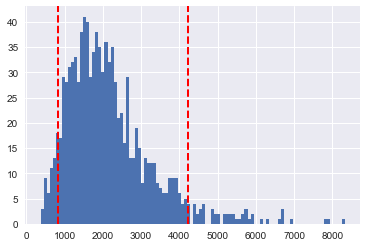

In [7]:
plt.hist(ending_prices,bins=100)
plt.axvline(np.percentile(ending_prices,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(ending_prices,95), color='r', linestyle='dashed', linewidth=2)
# plt.axhline(stockData['Adjusted Close'][1],color='g', linestyle='dashed',linewidth=2)
plt.show()


Sources: 

* http://www.pythonforfinance.net/2016/11/28/monte-carlo-simulation-in-python/
* https://github.com/MishaShapo/Monte_Carlo_Stocks/blob/master/Simulating_Stock_Prices_with_Monte_Carlo_Methods.ipynb
* http://www.investinganswers.com/financial-dictionary/ratio-analysis/compound-annual-growth-rate-cagr-1096
* https://www.alphavantage.co/
* https://github.com/RomelTorres/alpha_vantage
* https://www.investopedia.com/terms/e/expectedreturn.asp
    
    

